# Model 3 x Script

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import tensorflow as tf
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.1)
session = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

2023-05-31 04:28:56.322218: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-31 04:28:56.704144: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-31 04:28:56.709304: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 04:28:59.414510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-31 04:29:03.025278: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

Loading all the trajectories generated by the script.

In [5]:
xs_all = loadmat('../script_sanches/xs_all.mat')
tau_all = loadmat('../script_sanches/tau_all.mat')

### Taking data from the script

Choosing arbitrary one of the trajectories and organizing the Data Frame.

In [27]:
xs = pd.DataFrame(xs_all['xs_all'][500][0]).T.rename(columns={
    0: 'x.', 1: 'y.', 2: 'z.', 3: 'phi.', 4: 'theta.', 5: 'psi.', 6: 'x', 7: 'y', 8: 'z', 9: 'phi', 10: 'theta', 11: 'psi',
})
xs

,x.,y.,z.,phi.,theta.,psi.,x,y,z,phi,theta,psi
0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.500000
1,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.500000
2,0.000000,0.000000e+00,6.600000e-03,0.000000,0.000000,-0.021645,0.000000e+00,0.000000e+00,0.000007,0.000000,0.000000,0.499978
3,0.000000,0.000000e+00,1.320000e-02,-0.002891,0.063893,-0.043290,0.000000e+00,0.000000e+00,0.000026,-0.000003,0.000064,0.499913
4,0.000001,8.686867e-07,1.977359e-02,-0.005792,0.127767,-0.064841,1.432476e-09,8.686867e-10,0.000059,-0.000012,0.000256,0.499805
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,-0.246068,1.275127e-01,1.243447e-09,0.003246,0.006272,-0.000001,1.088066e+00,1.321120e+00,3.000000,0.012391,-0.006443,0.000002
19997,-0.246195,1.272696e-01,1.221419e-09,0.003240,0.006275,-0.000001,1.087574e+00,1.321375e+00,3.000000,0.012397,-0.006430,0.000002
19998,-0.246321,1.270264e-01,1.199387e-09,0.003234,0.006279,-0.000001,1.087081e+00,1.321629e+00,3.000000,0.012404,-0.006418,0.000002
19999,-0.246447,1.267830e-01,1.177350e-09,0.003228,0.006282,-0.000001,1.086589e+00,1.321883e+00,3.000000,0.012410,-0.006405,0.000002


In [28]:
tau = pd.DataFrame(tau_all['tau_all'][0][0]).T.rename(columns={
    0: 'U1', 1: 'U2', 2: 'U3', 3: 'U4'
})
tau

,U1,U2,U3,U4
0,21.582000,0.000000,0.000000,0.000000e+00
1,28.842000,0.000000,0.000000,-2.500000e-01
2,28.842000,-0.004885,0.199062,-2.500000e-01
3,28.812944,-0.004921,0.198915,-2.489069e-01
4,28.783856,-0.004915,0.176262,-2.477922e-01
...,...,...,...,...
19996,21.584105,-0.000052,0.000027,-8.446522e-07
19997,21.584105,-0.000052,0.000027,-8.434733e-07
19998,21.584105,-0.000052,0.000027,-8.422910e-07
19999,21.584105,-0.000052,0.000027,-8.411053e-07


### Generating data

Loading the model

In [29]:
model_3 = tf.keras.models.load_model('../script_sanches/model_3.h5')
model_4 = tf.keras.models.load_model('../script_sanches/model_4.h5')

Converting the $x_s$ vector from a Pandas data frame to a NumPy array.

In [30]:
xs_numpy = xs.to_numpy()

Resizing the array to be compatible with the model. The model requires a 3 dimensional shape (`batch_size`, `time`, `parameters`) and the array has only 2 (`time`, `parameters`)

In [31]:
xs_numpy_reshaped = np.reshape(xs_numpy, (1, 20001,12))

Generating the $\tau$ vector.

In [35]:
tau_predicted_3 = model_3.predict(xs_numpy_reshaped)
tau_predicted_3 = tau_predicted_3.reshape(20001,4)


1/1 [==============================] - 0s 54ms/step


In [52]:

from sklearn.preprocessing import normalize
xs_numpy_norm = normalize(xs_numpy).reshape(1,20001,12)


In [53]:
tau_predicted_4 = model_4.predict(xs_numpy_norm)
tau_predicted_4 = tau_predicted_4.reshape(20001,4)

1/1 [==============================] - 0s 24ms/step


Generating the time vector.

In [16]:
t = np.linspace(0,200,20001)

Configuring the plot.

In [17]:
plt.style.use(['seaborn-v0_8-darkgrid'])
# from cycler import cycler
plt.rcParams.update({
    'axes.prop_cycle': plt.cycler(linestyle=['solid','dashed','dotted', 'dashdot'], color=['darkblue','darkred','darkgreen', 'darkgoldenrod']),
    # 'axes.facecolor': '#e6e6e6',
    'axes.grid': True,
    # 'axes.linewidth': 0.5, # Use with seaborn-v0_8-white and dracula
    # 'grid.alpha': 0.1, # Use with dracula
    'lines.linewidth': 1,
    'grid.linewidth': 0.5,
    'font.family': 'serif',
    'font.size': 12,
    'pgf.texsystem': 'xelatex',
    # 'pgf.preamble':  r'\usepackage{stix2}\usepackage[scale=0.88]{inter}',
    # 'pgf.preamble': r'\usepackage{unicode-math,fontspec}\setmathfont{STIX Two Math}\setsansfont{Inter}[Scale=0.88]',
    # 'pgf.preamble': r'\usepackage[default]{fontsetup}',
    # 'pgf.preamble': r'\usepackage{unicode-math,fontspec}\setmathfont{STIX Two Math}\setmainfont{STIX Two Text}\setsansfont{TeX Gyre Heros}[LetterSpace=-0.2]',
    'pgf.rcfonts' : False
})

Plotting the $x_s$ vector.

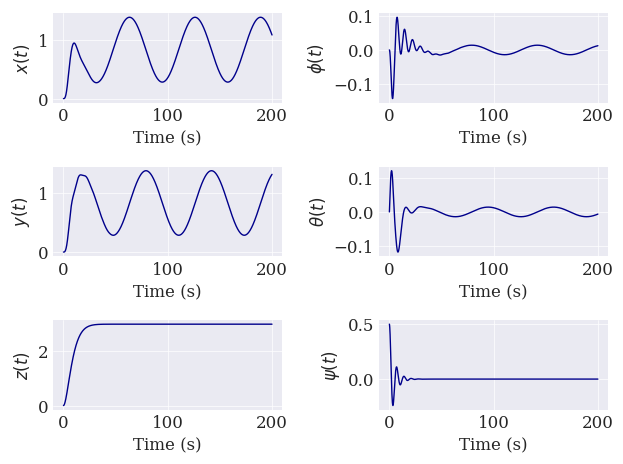

In [18]:
fig, ax = plt.subplots(3,2)

# x, y, z
ax[0,0].plot(t, xs['x'])
ax[0,0].set_ylabel('$x(t)$')

ax[1,0].plot(t, xs['y'])
ax[1,0].set_ylabel('$y(t)$')

ax[2,0].plot(t, xs['z'])
ax[2,0].set_ylabel('$z(t)$')

# phi, theta, psi
ax[0,1].plot(t, xs['phi'])
ax[0,1].set_ylabel(r'$\phi(t)$')

ax[1,1].plot(t, xs['theta'])
ax[1,1].set_ylabel(r'$\theta(t)$')

ax[2,1].plot(t, xs['psi'])
ax[2,1].set_ylabel(r'$\psi(t)$')



for i in range(3):
    for j in range(2):
        ax[i,j].set_xlabel('Time (s)')


fig.tight_layout()

Comparing the model with the script for the $\tau$ vector.

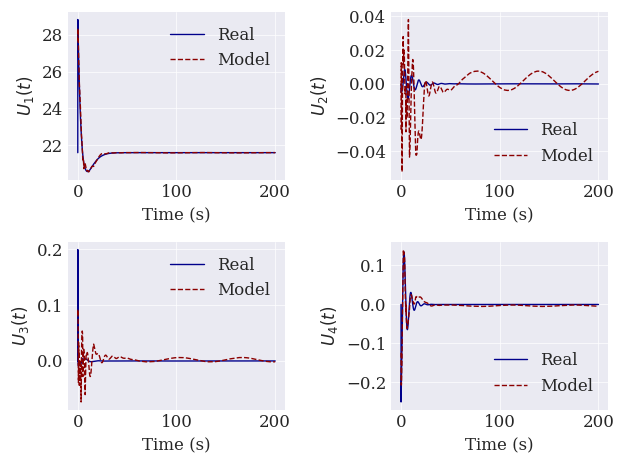

In [20]:
fig1, ax1 = plt.subplots(2,2)

ax1[0,0].plot(t, tau['U1'], label='Real')
ax1[0,0].plot(t, tau_predicted3[:,0], label='Model')
ax1[0,0].set_ylabel('$U_1(t)$')


ax1[0,1].plot(t, tau['U2'], label='Real')
ax1[0,1].plot(t, tau_predicted3[:,1], label='Model')
ax1[0,1].set_ylabel('$U_2(t)$')

ax1[1,0].plot(t, tau['U3'], label='Real')
ax1[1,0].plot(t, tau_predicted3[:,2], label='Model')
ax1[1,0].set_ylabel('$U_3(t)$')

ax1[1,1].plot(t, tau['U4'], label='Real')
ax1[1,1].plot(t, tau_predicted3[:,3], label='Model')
ax1[1,1].set_ylabel('$U_4(t)$')


for i in range(2):
    for j in range(2):
        ax1[i,j].set_xlabel('Time (s)')
        ax1[i,j].legend(loc='best')

fig1.tight_layout()

plt.show()
fig1.savefig('../../report/figures/4results/uav/uxt_comparasion_model_script.pgf', backend='pgf')

In [39]:
tau_norm = normalize(tau)
len(pd.DataFrame(tau_norm)[0])

20001

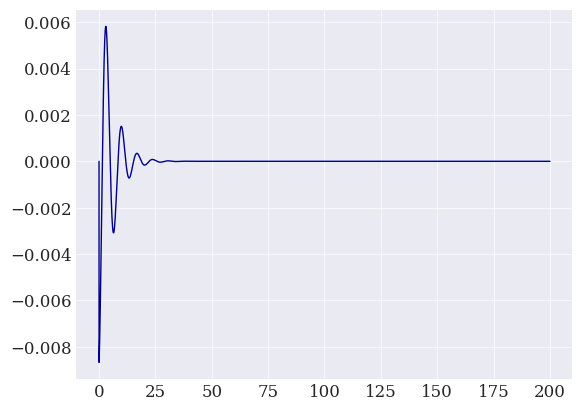

In [47]:
plt.plot(t, tau_norm[:,3])

In [ ]:
fig1, ax1 = plt.subplots(2,2)

ax1[0,0].plot(t, tau_norm[0], label='Real')
ax1[0,0].plot(t, tau_predicted4[:,0], label='Model')
ax1[0,0].set_ylabel('$U_1(t)$')


ax1[0,1].plot(t, tau_norm[1], label='Real')
ax1[0,1].plot(t, tau_predicted4[:,1], label='Model')
ax1[0,1].set_ylabel('$U_2(t)$')

ax1[1,0].plot(t, tau_norm[2], label='Real')
ax1[1,0].plot(t, tau_predicted4[:,2], label='Model')
ax1[1,0].set_ylabel('$U_3(t)$')

ax1[1,1].plot(t, tau_norm[3], label='Real')
ax1[1,1].plot(t, tau_predicted4[:,3], label='Model')
ax1[1,1].set_ylabel('$U_4(t)$')


for i in range(2):
    for j in range(2):
        ax1[i,j].set_xlabel('Time (s)')
        ax1[i,j].legend(loc='best')

fig1.tight_layout()

plt.show()
# fig1.savefig('../../report/figures/4results/uav/uxt_comparasion_model_script.pgf', backend='pgf')

In [54]:
def plot_comparison_tau(time,
                        time_points,
                        tau_true,
                        model_predict,
                        ):

    t = np.linspace(0,time,time_points)

    ax1[0,0].plot(t, tau_true[:,0], label='Real')
    ax1[0,0].plot(t, model_predict[:,0], label='Model')
    ax1[0,0].set_ylabel('$U_1(t)$')


    ax1[0,1].plot(t, tau_true[:,1], label='Real')
    ax1[0,1].plot(t, model_predict[:,1], label='Model')
    ax1[0,1].set_ylabel('$U_2(t)$')

    ax1[1,0].plot(t, tau_true[:,2], label='Real')
    ax1[1,0].plot(t, model_predict[:,2], label='Model')
    ax1[1,0].set_ylabel('$U_3(t)$')

    ax1[1,1].plot(t, tau_true[:,3], label='Real')
    ax1[1,1].plot(t, model_predict[:,3], label='Model')
    ax1[1,1].set_ylabel('$U_4(t)$')


    for i in range(2):
        for j in range(2):
            ax1[i,j].set_xlabel('Time (s)')
            ax1[i,j].legend(loc='best')

    fig1.tight_layout()

In [ ]:
plot_comparison_tau(time=200,
                    time_points=20001,
                    tau_true=tau)